In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold   
import seaborn as sns
from sklearn import preprocessing 
import warnings
warnings.filterwarnings(action="ignore")
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import sklearn.metrics as sm

In [3]:
data = pd.read_csv('1805171.csv')
data

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200781803,JRD llc,2019-12-17 00:00:00,2019.0,1.930207e+09,2019-12-02,20191202,20191202,20191217.0,USD,RV,1.0,NaN,13256.35,20191202.0,NAA8,1.930207e+09,0
1,U001,0200418007,AM foundation,2019-07-18 00:00:00,2019.0,1.929540e+09,2019-06-27,20190625,20190627,20190712.0,USD,RV,1.0,NaN,2275.70,20190627.0,NAA8,1.929540e+09,0
2,U001,0200186937,SYSC in,2019-08-12 00:00:00,2019.0,1.929661e+09,2019-07-24,20190724,20190724,20190808.0,USD,RV,1.0,NaN,14082.33,20190724.0,NAA8,1.929661e+09,0
3,U001,0200729290,KROGER foundation,2019-11-12 00:00:00,2019.0,1.930055e+09,2019-10-27,20191026,20191027,20191111.0,USD,RV,1.0,NaN,89123.21,20191027.0,NAA8,1.930055e+09,0
4,U001,200769623,WAL-MAR foundation,2019-07-16 00:00:00,2019.0,1.929579e+09,2019-07-05,20190705,20190705,20190720.0,USD,RV,1.0,NaN,37526.53,20190705.0,NAH4,1.929579e+09,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,U001,0200769623,WAL-MAR corp,NaN,2020.0,1.930676e+09,2020-03-22,20200320,20200322,20200406.0,USD,RV,1.0,NaN,2518.66,20200322.0,NAH4,1.930676e+09,1
49996,U001,0200778870,C us,NaN,2020.0,1.930762e+09,2020-04-08,20200408,20200408,20200423.0,USD,RV,1.0,NaN,431.50,20200408.0,NAA8,1.930762e+09,1
49997,U001,0200526831,PERISH,NaN,2020.0,1.930648e+09,2020-03-13,20200313,20200313,20200328.0,USD,RV,1.0,NaN,124959.22,20200313.0,NAA8,1.930648e+09,1
49998,U001,0200780383,MEIJ us,NaN,2020.0,1.930720e+09,2020-03-31,20200330,20200331,20200415.0,USD,RV,1.0,NaN,52664.95,20200331.0,NAA8,1.930720e+09,1


# PRE PROCESSING, NULL IMPUTATION,REMOVAL OF ANOMALIES

In [4]:
super_test = data[data['clear_date'].isnull()]
super_test#super_test: the data where cleardate is null

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
46691,U001,0200726979,BJ'S systems,NaN,2020.0,1.930611e+09,2020-03-06,20200306,20200306,20200321.0,USD,RV,1.0,NaN,194.78,20200306.0,NAA8,1.930611e+09,1
46692,U001,0200729942,SA associates,NaN,2020.0,1.930800e+09,2020-04-19,20200418,20200419,20200504.0,USD,RV,1.0,NaN,16360.32,20200419.0,NAA8,1.930800e+09,1
46693,U001,0200707822,PUBLI systems,NaN,2020.0,1.930645e+09,2020-03-14,20200312,20200314,20200329.0,USD,RV,1.0,NaN,151765.50,20200314.0,NAA8,1.930645e+09,1
46694,CA02,0140104423,METRO llc,NaN,2020.0,2.960621e+09,2020-03-18,20200318,20200318,20200330.0,CAD,RV,1.0,NaN,76268.59,20200320.0,CA10,2.960621e+09,1
46695,U001,200769623,WAL-MAR associates,NaN,2020.0,1.930883e+09,2020-05-09,20200509,20200509,20200524.0,USD,RV,1.0,NaN,32884.18,20200509.0,NAH4,1.930883e+09,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,U001,0200769623,WAL-MAR corp,NaN,2020.0,1.930676e+09,2020-03-22,20200320,20200322,20200406.0,USD,RV,1.0,NaN,2518.66,20200322.0,NAH4,1.930676e+09,1
49996,U001,0200778870,C us,NaN,2020.0,1.930762e+09,2020-04-08,20200408,20200408,20200423.0,USD,RV,1.0,NaN,431.50,20200408.0,NAA8,1.930762e+09,1
49997,U001,0200526831,PERISH,NaN,2020.0,1.930648e+09,2020-03-13,20200313,20200313,20200328.0,USD,RV,1.0,NaN,124959.22,20200313.0,NAA8,1.930648e+09,1
49998,U001,0200780383,MEIJ us,NaN,2020.0,1.930720e+09,2020-03-31,20200330,20200331,20200415.0,USD,RV,1.0,NaN,52664.95,20200331.0,NAA8,1.930720e+09,1


In [5]:
df = data[~data['clear_date'].isnull()]#rest data set
df

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200781803,JRD llc,2019-12-17 00:00:00,2019.0,1.930207e+09,2019-12-02,20191202,20191202,20191217.0,USD,RV,1.0,NaN,13256.35,20191202.0,NAA8,1.930207e+09,0
1,U001,0200418007,AM foundation,2019-07-18 00:00:00,2019.0,1.929540e+09,2019-06-27,20190625,20190627,20190712.0,USD,RV,1.0,NaN,2275.70,20190627.0,NAA8,1.929540e+09,0
2,U001,0200186937,SYSC in,2019-08-12 00:00:00,2019.0,1.929661e+09,2019-07-24,20190724,20190724,20190808.0,USD,RV,1.0,NaN,14082.33,20190724.0,NAA8,1.929661e+09,0
3,U001,0200729290,KROGER foundation,2019-11-12 00:00:00,2019.0,1.930055e+09,2019-10-27,20191026,20191027,20191111.0,USD,RV,1.0,NaN,89123.21,20191027.0,NAA8,1.930055e+09,0
4,U001,200769623,WAL-MAR foundation,2019-07-16 00:00:00,2019.0,1.929579e+09,2019-07-05,20190705,20190705,20190720.0,USD,RV,1.0,NaN,37526.53,20190705.0,NAH4,1.929579e+09,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46686,CA02,0140106408,WAL-M corp,2020-02-19 00:00:00,2020.0,2.960611e+09,2020-01-28,20200129,20200128,20200208.0,CAD,RV,1.0,NaN,76636.84,20200129.0,CA10,2.960611e+09,0
46687,U001,200769623,WAL-MAR systems,2019-04-23 00:00:00,2019.0,1.929137e+09,2019-04-13,20190412,20190413,20190428.0,USD,RV,1.0,NaN,446.22,20190413.0,NAH4,1.929137e+09,0
46688,U001,0200769623,WAL-MAR co,2019-04-02 00:00:00,2019.0,1.928955e+09,2019-03-15,20190312,20190315,20190330.0,USD,RV,1.0,NaN,10895.77,20190315.0,NAH4,1.928955e+09,0
46689,U001,200726979,BJ'S associates,2020-01-13 00:00:00,2020.0,1.930332e+09,2019-12-29,20191228,20191229,20200113.0,USD,RV,1.0,NaN,107.26,20191229.0,NAA8,1.930332e+09,0


In [6]:
df.dropna(how='any',axis=1,inplace=True)  #checked if any column has full null value and got deleted(eg.area_of_business)
df.dropna(how='any',axis=0,inplace=True)  #checked if any row has full null value and got deleted
df

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,isOpen
0,U001,0200781803,JRD llc,2019-12-17 00:00:00,2019.0,1.930207e+09,2019-12-02,20191202,20191202,20191217.0,USD,RV,1.0,13256.35,20191202.0,NAA8,0
1,U001,0200418007,AM foundation,2019-07-18 00:00:00,2019.0,1.929540e+09,2019-06-27,20190625,20190627,20190712.0,USD,RV,1.0,2275.70,20190627.0,NAA8,0
2,U001,0200186937,SYSC in,2019-08-12 00:00:00,2019.0,1.929661e+09,2019-07-24,20190724,20190724,20190808.0,USD,RV,1.0,14082.33,20190724.0,NAA8,0
3,U001,0200729290,KROGER foundation,2019-11-12 00:00:00,2019.0,1.930055e+09,2019-10-27,20191026,20191027,20191111.0,USD,RV,1.0,89123.21,20191027.0,NAA8,0
4,U001,200769623,WAL-MAR foundation,2019-07-16 00:00:00,2019.0,1.929579e+09,2019-07-05,20190705,20190705,20190720.0,USD,RV,1.0,37526.53,20190705.0,NAH4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46686,CA02,0140106408,WAL-M corp,2020-02-19 00:00:00,2020.0,2.960611e+09,2020-01-28,20200129,20200128,20200208.0,CAD,RV,1.0,76636.84,20200129.0,CA10,0
46687,U001,200769623,WAL-MAR systems,2019-04-23 00:00:00,2019.0,1.929137e+09,2019-04-13,20190412,20190413,20190428.0,USD,RV,1.0,446.22,20190413.0,NAH4,0
46688,U001,0200769623,WAL-MAR co,2019-04-02 00:00:00,2019.0,1.928955e+09,2019-03-15,20190312,20190315,20190330.0,USD,RV,1.0,10895.77,20190315.0,NAH4,0
46689,U001,200726979,BJ'S associates,2020-01-13 00:00:00,2020.0,1.930332e+09,2019-12-29,20191228,20191229,20200113.0,USD,RV,1.0,107.26,20191229.0,NAA8,0


# CONVERTING TO DATE TYPE

In [7]:
df['clear_date']= pd.to_datetime(df['clear_date'])
df['posting_date']= pd.to_datetime(df['posting_date'])
df['document_create_date']= pd.to_datetime(df['document_create_date'], format='%Y%m%d')
df['due_in_date']= pd.to_datetime(df['due_in_date'], format='%Y%m%d')
df['baseline_create_date']= pd.to_datetime(df['baseline_create_date'], format='%Y%m%d')
df #transfroming float to date type for date columns

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,isOpen
0,U001,0200781803,JRD llc,2019-12-17,2019.0,1.930207e+09,2019-12-02,2019-12-02,20191202,2019-12-17,USD,RV,1.0,13256.35,2019-12-02,NAA8,0
1,U001,0200418007,AM foundation,2019-07-18,2019.0,1.929540e+09,2019-06-27,2019-06-25,20190627,2019-07-12,USD,RV,1.0,2275.70,2019-06-27,NAA8,0
2,U001,0200186937,SYSC in,2019-08-12,2019.0,1.929661e+09,2019-07-24,2019-07-24,20190724,2019-08-08,USD,RV,1.0,14082.33,2019-07-24,NAA8,0
3,U001,0200729290,KROGER foundation,2019-11-12,2019.0,1.930055e+09,2019-10-27,2019-10-26,20191027,2019-11-11,USD,RV,1.0,89123.21,2019-10-27,NAA8,0
4,U001,200769623,WAL-MAR foundation,2019-07-16,2019.0,1.929579e+09,2019-07-05,2019-07-05,20190705,2019-07-20,USD,RV,1.0,37526.53,2019-07-05,NAH4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46686,CA02,0140106408,WAL-M corp,2020-02-19,2020.0,2.960611e+09,2020-01-28,2020-01-29,20200128,2020-02-08,CAD,RV,1.0,76636.84,2020-01-29,CA10,0
46687,U001,200769623,WAL-MAR systems,2019-04-23,2019.0,1.929137e+09,2019-04-13,2019-04-12,20190413,2019-04-28,USD,RV,1.0,446.22,2019-04-13,NAH4,0
46688,U001,0200769623,WAL-MAR co,2019-04-02,2019.0,1.928955e+09,2019-03-15,2019-03-12,20190315,2019-03-30,USD,RV,1.0,10895.77,2019-03-15,NAH4,0
46689,U001,200726979,BJ'S associates,2020-01-13,2020.0,1.930332e+09,2019-12-29,2019-12-28,20191229,2020-01-13,USD,RV,1.0,107.26,2019-12-29,NAA8,0


# REMOVING ANOMALIES

In [8]:
a = df['document_create_date']
b = df['baseline_create_date']
c = df['due_in_date']
d = df['clear_date']
e = df['posting_date']
#for easy to cheack i just use variable a,b,c,d,e

In [9]:
print((a>b).sum())
print((a>c).sum())
print((a>d).sum())
print((b>d).sum())
print((b>e).sum())

5228
170
0
3
3123


In [10]:
df.drop(df[df['baseline_create_date'] > df['clear_date']].index,inplace=True)

df


,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,isOpen
0,U001,0200781803,JRD llc,2019-12-17,2019.0,1.930207e+09,2019-12-02,2019-12-02,20191202,2019-12-17,USD,RV,1.0,13256.35,2019-12-02,NAA8,0
1,U001,0200418007,AM foundation,2019-07-18,2019.0,1.929540e+09,2019-06-27,2019-06-25,20190627,2019-07-12,USD,RV,1.0,2275.70,2019-06-27,NAA8,0
2,U001,0200186937,SYSC in,2019-08-12,2019.0,1.929661e+09,2019-07-24,2019-07-24,20190724,2019-08-08,USD,RV,1.0,14082.33,2019-07-24,NAA8,0
3,U001,0200729290,KROGER foundation,2019-11-12,2019.0,1.930055e+09,2019-10-27,2019-10-26,20191027,2019-11-11,USD,RV,1.0,89123.21,2019-10-27,NAA8,0
4,U001,200769623,WAL-MAR foundation,2019-07-16,2019.0,1.929579e+09,2019-07-05,2019-07-05,20190705,2019-07-20,USD,RV,1.0,37526.53,2019-07-05,NAH4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46686,CA02,0140106408,WAL-M corp,2020-02-19,2020.0,2.960611e+09,2020-01-28,2020-01-29,20200128,2020-02-08,CAD,RV,1.0,76636.84,2020-01-29,CA10,0
46687,U001,200769623,WAL-MAR systems,2019-04-23,2019.0,1.929137e+09,2019-04-13,2019-04-12,20190413,2019-04-28,USD,RV,1.0,446.22,2019-04-13,NAH4,0
46688,U001,0200769623,WAL-MAR co,2019-04-02,2019.0,1.928955e+09,2019-03-15,2019-03-12,20190315,2019-03-30,USD,RV,1.0,10895.77,2019-03-15,NAH4,0
46689,U001,200726979,BJ'S associates,2020-01-13,2020.0,1.930332e+09,2019-12-29,2019-12-28,20191229,2020-01-13,USD,RV,1.0,107.26,2019-12-29,NAA8,0


In [11]:
df.drop(df[df['document_create_date'] > df['clear_date']].index,inplace=True)

df


,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,isOpen
0,U001,0200781803,JRD llc,2019-12-17,2019.0,1.930207e+09,2019-12-02,2019-12-02,20191202,2019-12-17,USD,RV,1.0,13256.35,2019-12-02,NAA8,0
1,U001,0200418007,AM foundation,2019-07-18,2019.0,1.929540e+09,2019-06-27,2019-06-25,20190627,2019-07-12,USD,RV,1.0,2275.70,2019-06-27,NAA8,0
2,U001,0200186937,SYSC in,2019-08-12,2019.0,1.929661e+09,2019-07-24,2019-07-24,20190724,2019-08-08,USD,RV,1.0,14082.33,2019-07-24,NAA8,0
3,U001,0200729290,KROGER foundation,2019-11-12,2019.0,1.930055e+09,2019-10-27,2019-10-26,20191027,2019-11-11,USD,RV,1.0,89123.21,2019-10-27,NAA8,0
4,U001,200769623,WAL-MAR foundation,2019-07-16,2019.0,1.929579e+09,2019-07-05,2019-07-05,20190705,2019-07-20,USD,RV,1.0,37526.53,2019-07-05,NAH4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46686,CA02,0140106408,WAL-M corp,2020-02-19,2020.0,2.960611e+09,2020-01-28,2020-01-29,20200128,2020-02-08,CAD,RV,1.0,76636.84,2020-01-29,CA10,0
46687,U001,200769623,WAL-MAR systems,2019-04-23,2019.0,1.929137e+09,2019-04-13,2019-04-12,20190413,2019-04-28,USD,RV,1.0,446.22,2019-04-13,NAH4,0
46688,U001,0200769623,WAL-MAR co,2019-04-02,2019.0,1.928955e+09,2019-03-15,2019-03-12,20190315,2019-03-30,USD,RV,1.0,10895.77,2019-03-15,NAH4,0
46689,U001,200726979,BJ'S associates,2020-01-13,2020.0,1.930332e+09,2019-12-29,2019-12-28,20191229,2020-01-13,USD,RV,1.0,107.26,2019-12-29,NAA8,0


In [12]:
df.drop(df[df['posting_date'] > df['clear_date']].index,inplace=True)

df


,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,isOpen
0,U001,0200781803,JRD llc,2019-12-17,2019.0,1.930207e+09,2019-12-02,2019-12-02,20191202,2019-12-17,USD,RV,1.0,13256.35,2019-12-02,NAA8,0
1,U001,0200418007,AM foundation,2019-07-18,2019.0,1.929540e+09,2019-06-27,2019-06-25,20190627,2019-07-12,USD,RV,1.0,2275.70,2019-06-27,NAA8,0
2,U001,0200186937,SYSC in,2019-08-12,2019.0,1.929661e+09,2019-07-24,2019-07-24,20190724,2019-08-08,USD,RV,1.0,14082.33,2019-07-24,NAA8,0
3,U001,0200729290,KROGER foundation,2019-11-12,2019.0,1.930055e+09,2019-10-27,2019-10-26,20191027,2019-11-11,USD,RV,1.0,89123.21,2019-10-27,NAA8,0
4,U001,200769623,WAL-MAR foundation,2019-07-16,2019.0,1.929579e+09,2019-07-05,2019-07-05,20190705,2019-07-20,USD,RV,1.0,37526.53,2019-07-05,NAH4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46686,CA02,0140106408,WAL-M corp,2020-02-19,2020.0,2.960611e+09,2020-01-28,2020-01-29,20200128,2020-02-08,CAD,RV,1.0,76636.84,2020-01-29,CA10,0
46687,U001,200769623,WAL-MAR systems,2019-04-23,2019.0,1.929137e+09,2019-04-13,2019-04-12,20190413,2019-04-28,USD,RV,1.0,446.22,2019-04-13,NAH4,0
46688,U001,0200769623,WAL-MAR co,2019-04-02,2019.0,1.928955e+09,2019-03-15,2019-03-12,20190315,2019-03-30,USD,RV,1.0,10895.77,2019-03-15,NAH4,0
46689,U001,200726979,BJ'S associates,2020-01-13,2020.0,1.930332e+09,2019-12-29,2019-12-28,20191229,2020-01-13,USD,RV,1.0,107.26,2019-12-29,NAA8,0


In [13]:
df.drop(df[df['document_create_date'] > df['due_in_date']].index,inplace=True)
df.drop(df[df['baseline_create_date'] > df['due_in_date']].index,inplace=True)
df.drop(df[df['posting_date'] > df['due_in_date']].index,inplace=True)




In [14]:
df

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,isOpen
0,U001,0200781803,JRD llc,2019-12-17,2019.0,1.930207e+09,2019-12-02,2019-12-02,20191202,2019-12-17,USD,RV,1.0,13256.35,2019-12-02,NAA8,0
1,U001,0200418007,AM foundation,2019-07-18,2019.0,1.929540e+09,2019-06-27,2019-06-25,20190627,2019-07-12,USD,RV,1.0,2275.70,2019-06-27,NAA8,0
2,U001,0200186937,SYSC in,2019-08-12,2019.0,1.929661e+09,2019-07-24,2019-07-24,20190724,2019-08-08,USD,RV,1.0,14082.33,2019-07-24,NAA8,0
3,U001,0200729290,KROGER foundation,2019-11-12,2019.0,1.930055e+09,2019-10-27,2019-10-26,20191027,2019-11-11,USD,RV,1.0,89123.21,2019-10-27,NAA8,0
4,U001,200769623,WAL-MAR foundation,2019-07-16,2019.0,1.929579e+09,2019-07-05,2019-07-05,20190705,2019-07-20,USD,RV,1.0,37526.53,2019-07-05,NAH4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46686,CA02,0140106408,WAL-M corp,2020-02-19,2020.0,2.960611e+09,2020-01-28,2020-01-29,20200128,2020-02-08,CAD,RV,1.0,76636.84,2020-01-29,CA10,0
46687,U001,200769623,WAL-MAR systems,2019-04-23,2019.0,1.929137e+09,2019-04-13,2019-04-12,20190413,2019-04-28,USD,RV,1.0,446.22,2019-04-13,NAH4,0
46688,U001,0200769623,WAL-MAR co,2019-04-02,2019.0,1.928955e+09,2019-03-15,2019-03-12,20190315,2019-03-30,USD,RV,1.0,10895.77,2019-03-15,NAH4,0
46689,U001,200726979,BJ'S associates,2020-01-13,2020.0,1.930332e+09,2019-12-29,2019-12-28,20191229,2020-01-13,USD,RV,1.0,107.26,2019-12-29,NAA8,0


# CURRENCY CONVERTING 

In [15]:
df['total_open_amount']=np.where(df['invoice_currency'] == 'CAD',df['total_open_amount']*0.79,df['total_open_amount'])
df
#changing cad currency to usd

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,isOpen
0,U001,0200781803,JRD llc,2019-12-17,2019.0,1.930207e+09,2019-12-02,2019-12-02,20191202,2019-12-17,USD,RV,1.0,13256.3500,2019-12-02,NAA8,0
1,U001,0200418007,AM foundation,2019-07-18,2019.0,1.929540e+09,2019-06-27,2019-06-25,20190627,2019-07-12,USD,RV,1.0,2275.7000,2019-06-27,NAA8,0
2,U001,0200186937,SYSC in,2019-08-12,2019.0,1.929661e+09,2019-07-24,2019-07-24,20190724,2019-08-08,USD,RV,1.0,14082.3300,2019-07-24,NAA8,0
3,U001,0200729290,KROGER foundation,2019-11-12,2019.0,1.930055e+09,2019-10-27,2019-10-26,20191027,2019-11-11,USD,RV,1.0,89123.2100,2019-10-27,NAA8,0
4,U001,200769623,WAL-MAR foundation,2019-07-16,2019.0,1.929579e+09,2019-07-05,2019-07-05,20190705,2019-07-20,USD,RV,1.0,37526.5300,2019-07-05,NAH4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46686,CA02,0140106408,WAL-M corp,2020-02-19,2020.0,2.960611e+09,2020-01-28,2020-01-29,20200128,2020-02-08,CAD,RV,1.0,60543.1036,2020-01-29,CA10,0
46687,U001,200769623,WAL-MAR systems,2019-04-23,2019.0,1.929137e+09,2019-04-13,2019-04-12,20190413,2019-04-28,USD,RV,1.0,446.2200,2019-04-13,NAH4,0
46688,U001,0200769623,WAL-MAR co,2019-04-02,2019.0,1.928955e+09,2019-03-15,2019-03-12,20190315,2019-03-30,USD,RV,1.0,10895.7700,2019-03-15,NAH4,0
46689,U001,200726979,BJ'S associates,2020-01-13,2020.0,1.930332e+09,2019-12-29,2019-12-28,20191229,2020-01-13,USD,RV,1.0,107.2600,2019-12-29,NAA8,0


# DROPING CONSTANT AND QUASI CONSTANT COLUMN

In [16]:
df = df.drop(['posting_id','isOpen','document type','invoice_currency'],axis=1)
df

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,total_open_amount,baseline_create_date,cust_payment_terms
0,U001,0200781803,JRD llc,2019-12-17,2019.0,1.930207e+09,2019-12-02,2019-12-02,20191202,2019-12-17,13256.3500,2019-12-02,NAA8
1,U001,0200418007,AM foundation,2019-07-18,2019.0,1.929540e+09,2019-06-27,2019-06-25,20190627,2019-07-12,2275.7000,2019-06-27,NAA8
2,U001,0200186937,SYSC in,2019-08-12,2019.0,1.929661e+09,2019-07-24,2019-07-24,20190724,2019-08-08,14082.3300,2019-07-24,NAA8
3,U001,0200729290,KROGER foundation,2019-11-12,2019.0,1.930055e+09,2019-10-27,2019-10-26,20191027,2019-11-11,89123.2100,2019-10-27,NAA8
4,U001,200769623,WAL-MAR foundation,2019-07-16,2019.0,1.929579e+09,2019-07-05,2019-07-05,20190705,2019-07-20,37526.5300,2019-07-05,NAH4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
46686,CA02,0140106408,WAL-M corp,2020-02-19,2020.0,2.960611e+09,2020-01-28,2020-01-29,20200128,2020-02-08,60543.1036,2020-01-29,CA10
46687,U001,200769623,WAL-MAR systems,2019-04-23,2019.0,1.929137e+09,2019-04-13,2019-04-12,20190413,2019-04-28,446.2200,2019-04-13,NAH4
46688,U001,0200769623,WAL-MAR co,2019-04-02,2019.0,1.928955e+09,2019-03-15,2019-03-12,20190315,2019-03-30,10895.7700,2019-03-15,NAH4
46689,U001,200726979,BJ'S associates,2020-01-13,2020.0,1.930332e+09,2019-12-29,2019-12-28,20191229,2020-01-13,107.2600,2019-12-29,NAA8


# SORTING ON THE BASE OF DOCUMENT CRATE DATE 1

In [17]:
df.sort_values(by='document_create_date.1',inplace=True)
df

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,total_open_amount,baseline_create_date,cust_payment_terms
37543,U001,0200769623,WAL-MAR co,2019-01-09,2019.0,1.928538e+09,2018-12-30,2018-12-29,20181230,2019-01-14,364.9600,2018-12-30,NAH4
29016,U001,0200721222,GO co,2019-01-18,2019.0,1.928538e+09,2018-12-30,2018-12-29,20181230,2019-01-14,7011.3800,2018-12-30,NAA8
13001,U001,0200769623,WAL-MAR systems,2019-01-09,2019.0,1.928540e+09,2018-12-30,2018-12-29,20181230,2019-01-14,25912.5200,2018-12-30,NAH4
10146,U001,0200769623,WAL-MAR associates,2019-01-09,2019.0,1.928541e+09,2018-12-30,2018-12-29,20181230,2019-01-14,1972.0100,2018-12-30,NAH4
22109,CA02,0140106181,THE corp,2019-05-01,2019.0,2.960520e+09,2018-12-30,2018-12-30,20181230,2019-01-10,93001.4465,2018-12-31,CA10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
42478,U001,0200769623,WAL-MAR trust,2020-03-17,2020.0,1.930568e+09,2020-02-27,2020-02-25,20200227,2020-03-13,10401.6300,2020-02-27,NAH4
29462,U001,0200762950,HAR systems,2020-03-13,2020.0,1.930579e+09,2020-02-27,2020-02-27,20200227,2020-03-13,17377.5400,2020-02-27,NAA8
8137,U001,0200739044,PERFOR corporation,2020-03-16,2020.0,1.930574e+09,2020-02-27,2020-02-26,20200227,2020-03-13,25143.0200,2020-02-27,NAA8
7879,CA02,0140106408,WAL-M systems,2020-03-18,2020.0,2.960617e+09,2020-02-27,2020-02-27,20200227,2020-03-09,13281.4326,2020-02-28,CA10


In [18]:
df = df.drop(['document_create_date.1'],axis=1)
df

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,due_in_date,total_open_amount,baseline_create_date,cust_payment_terms
37543,U001,0200769623,WAL-MAR co,2019-01-09,2019.0,1.928538e+09,2018-12-30,2018-12-29,2019-01-14,364.9600,2018-12-30,NAH4
29016,U001,0200721222,GO co,2019-01-18,2019.0,1.928538e+09,2018-12-30,2018-12-29,2019-01-14,7011.3800,2018-12-30,NAA8
13001,U001,0200769623,WAL-MAR systems,2019-01-09,2019.0,1.928540e+09,2018-12-30,2018-12-29,2019-01-14,25912.5200,2018-12-30,NAH4
10146,U001,0200769623,WAL-MAR associates,2019-01-09,2019.0,1.928541e+09,2018-12-30,2018-12-29,2019-01-14,1972.0100,2018-12-30,NAH4
22109,CA02,0140106181,THE corp,2019-05-01,2019.0,2.960520e+09,2018-12-30,2018-12-30,2019-01-10,93001.4465,2018-12-31,CA10
...,...,...,...,...,...,...,...,...,...,...,...,...
42478,U001,0200769623,WAL-MAR trust,2020-03-17,2020.0,1.930568e+09,2020-02-27,2020-02-25,2020-03-13,10401.6300,2020-02-27,NAH4
29462,U001,0200762950,HAR systems,2020-03-13,2020.0,1.930579e+09,2020-02-27,2020-02-27,2020-03-13,17377.5400,2020-02-27,NAA8
8137,U001,0200739044,PERFOR corporation,2020-03-16,2020.0,1.930574e+09,2020-02-27,2020-02-26,2020-03-13,25143.0200,2020-02-27,NAA8
7879,CA02,0140106408,WAL-M systems,2020-03-18,2020.0,2.960617e+09,2020-02-27,2020-02-27,2020-03-09,13281.4326,2020-02-28,CA10


# HERE WE CALCUATE TARGET THAT IS DELAY

In [19]:
df['delay'] = (df['clear_date'].dt.day - df['due_in_date'].dt.day)
df

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,due_in_date,total_open_amount,baseline_create_date,cust_payment_terms,delay
37543,U001,0200769623,WAL-MAR co,2019-01-09,2019.0,1.928538e+09,2018-12-30,2018-12-29,2019-01-14,364.9600,2018-12-30,NAH4,-5
29016,U001,0200721222,GO co,2019-01-18,2019.0,1.928538e+09,2018-12-30,2018-12-29,2019-01-14,7011.3800,2018-12-30,NAA8,4
13001,U001,0200769623,WAL-MAR systems,2019-01-09,2019.0,1.928540e+09,2018-12-30,2018-12-29,2019-01-14,25912.5200,2018-12-30,NAH4,-5
10146,U001,0200769623,WAL-MAR associates,2019-01-09,2019.0,1.928541e+09,2018-12-30,2018-12-29,2019-01-14,1972.0100,2018-12-30,NAH4,-5
22109,CA02,0140106181,THE corp,2019-05-01,2019.0,2.960520e+09,2018-12-30,2018-12-30,2019-01-10,93001.4465,2018-12-31,CA10,-9
...,...,...,...,...,...,...,...,...,...,...,...,...,...
42478,U001,0200769623,WAL-MAR trust,2020-03-17,2020.0,1.930568e+09,2020-02-27,2020-02-25,2020-03-13,10401.6300,2020-02-27,NAH4,4
29462,U001,0200762950,HAR systems,2020-03-13,2020.0,1.930579e+09,2020-02-27,2020-02-27,2020-03-13,17377.5400,2020-02-27,NAA8,0
8137,U001,0200739044,PERFOR corporation,2020-03-16,2020.0,1.930574e+09,2020-02-27,2020-02-26,2020-03-13,25143.0200,2020-02-27,NAA8,3
7879,CA02,0140106408,WAL-M systems,2020-03-18,2020.0,2.960617e+09,2020-02-27,2020-02-27,2020-03-09,13281.4326,2020-02-28,CA10,9


In [20]:
df['delay'].describe()

count    46518.000000
mean         0.057548
std          8.473468
min        -30.000000
25%         -3.000000
50%          0.000000
75%          2.000000
max         30.000000
Name: delay, dtype: float64

In [21]:
len(df['doc_id'].unique()) 



46518

## the doc id is highly cardinal  as no of unique doc_id is equal to no of rows of data frame this may cause over fitting  so remove it 

In [22]:
df =df.drop(['doc_id'],axis=1)
df

,business_code,cust_number,name_customer,clear_date,buisness_year,posting_date,document_create_date,due_in_date,total_open_amount,baseline_create_date,cust_payment_terms,delay
37543,U001,0200769623,WAL-MAR co,2019-01-09,2019.0,2018-12-30,2018-12-29,2019-01-14,364.9600,2018-12-30,NAH4,-5
29016,U001,0200721222,GO co,2019-01-18,2019.0,2018-12-30,2018-12-29,2019-01-14,7011.3800,2018-12-30,NAA8,4
13001,U001,0200769623,WAL-MAR systems,2019-01-09,2019.0,2018-12-30,2018-12-29,2019-01-14,25912.5200,2018-12-30,NAH4,-5
10146,U001,0200769623,WAL-MAR associates,2019-01-09,2019.0,2018-12-30,2018-12-29,2019-01-14,1972.0100,2018-12-30,NAH4,-5
22109,CA02,0140106181,THE corp,2019-05-01,2019.0,2018-12-30,2018-12-30,2019-01-10,93001.4465,2018-12-31,CA10,-9
...,...,...,...,...,...,...,...,...,...,...,...,...
42478,U001,0200769623,WAL-MAR trust,2020-03-17,2020.0,2020-02-27,2020-02-25,2020-03-13,10401.6300,2020-02-27,NAH4,4
29462,U001,0200762950,HAR systems,2020-03-13,2020.0,2020-02-27,2020-02-27,2020-03-13,17377.5400,2020-02-27,NAA8,0
8137,U001,0200739044,PERFOR corporation,2020-03-16,2020.0,2020-02-27,2020-02-26,2020-03-13,25143.0200,2020-02-27,NAA8,3
7879,CA02,0140106408,WAL-M systems,2020-03-18,2020.0,2020-02-27,2020-02-27,2020-03-09,13281.4326,2020-02-28,CA10,9


# SPLITTING AND EDA 

In [23]:
from sklearn.model_selection import train_test_split
train,df_validation=train_test_split(df,test_size=0.20,shuffle=False,stratify=None)
vali,test=train_test_split(df_validation,test_size=0.5,shuffle=False,stratify=None)

In [24]:
print(train.shape)
print(vali.shape)
print(test.shape)

(37214, 12)
(4652, 12)
(4652, 12)


In [25]:
train

,business_code,cust_number,name_customer,clear_date,buisness_year,posting_date,document_create_date,due_in_date,total_open_amount,baseline_create_date,cust_payment_terms,delay
37543,U001,0200769623,WAL-MAR co,2019-01-09,2019.0,2018-12-30,2018-12-29,2019-01-14,364.9600,2018-12-30,NAH4,-5
29016,U001,0200721222,GO co,2019-01-18,2019.0,2018-12-30,2018-12-29,2019-01-14,7011.3800,2018-12-30,NAA8,4
13001,U001,0200769623,WAL-MAR systems,2019-01-09,2019.0,2018-12-30,2018-12-29,2019-01-14,25912.5200,2018-12-30,NAH4,-5
10146,U001,0200769623,WAL-MAR associates,2019-01-09,2019.0,2018-12-30,2018-12-29,2019-01-14,1972.0100,2018-12-30,NAH4,-5
22109,CA02,0140106181,THE corp,2019-05-01,2019.0,2018-12-30,2018-12-30,2019-01-10,93001.4465,2018-12-31,CA10,-9
...,...,...,...,...,...,...,...,...,...,...,...,...
20387,U001,0200794332,COST foundation,2019-12-02,2019.0,2019-11-18,2019-11-15,2019-12-03,11135.2700,2019-11-18,NAAX,-1
8338,U001,0200769623,WAL-MAR in,2019-11-29,2019.0,2019-11-18,2019-11-18,2019-12-03,8154.8500,2019-11-18,NAH4,26
834,U001,0200707822,PUBLI us,2019-12-20,2019.0,2019-11-18,2019-11-18,2019-12-03,13228.8300,2019-11-18,NAA8,17
24066,U001,0200705742,DOT llc,2019-12-03,2019.0,2019-11-18,2019-11-16,2019-12-03,24803.3300,2019-11-18,NAA8,0


# polting

<AxesSubplot:xlabel='delay'>

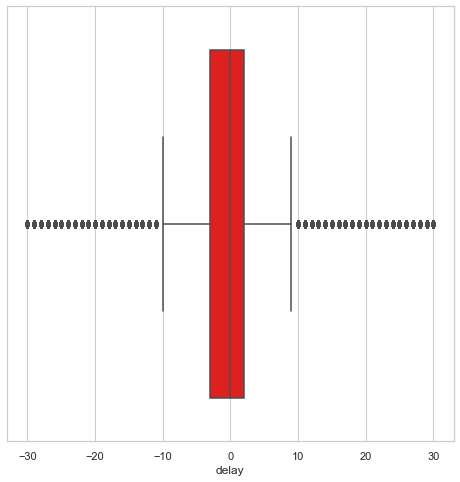

In [26]:
plt.figure(figsize=(8,8))
sns.set_theme(style="whitegrid")
sns.boxplot(x=train['delay'],width=0.8,color="red",whis=1.5,fliersize=5)

In [27]:
delay_list = list(train['delay'])


In [28]:
IQR=train['delay'].quantile(0.75)-train['delay'].quantile(0.25)
lower_boundary=train['delay'].quantile(0.25)-(IQR*3)
upper_boundary=train['delay'].quantile(0.75)+(IQR*3)
print(lower_boundary)
print(upper_boundary)

-18.0
17.0


<function matplotlib.pyplot.show(close=None, block=None)>

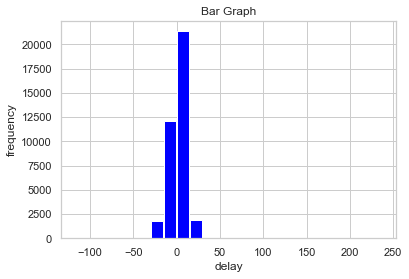

In [29]:
bins = [-120,-30,-15,0,15,30,45,60,245]
plt.hist(delay_list,bins,histtype='bar',rwidth=0.9,color='blue')
plt.xlabel('delay')
plt.ylabel('frequency')
plt.title('Bar Graph')
plt.show

0.04150848055975147


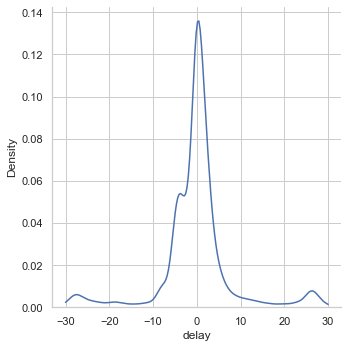

In [30]:
print(train['delay'].skew())
sns.displot(train['delay'],kind='kde',cut=0)

2.510589373191107


<AxesSubplot:xlabel='total_open_amount', ylabel='Density'>

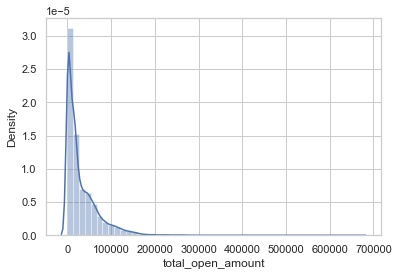

In [31]:
print(train['total_open_amount'].skew())
sns.distplot(train['total_open_amount'])

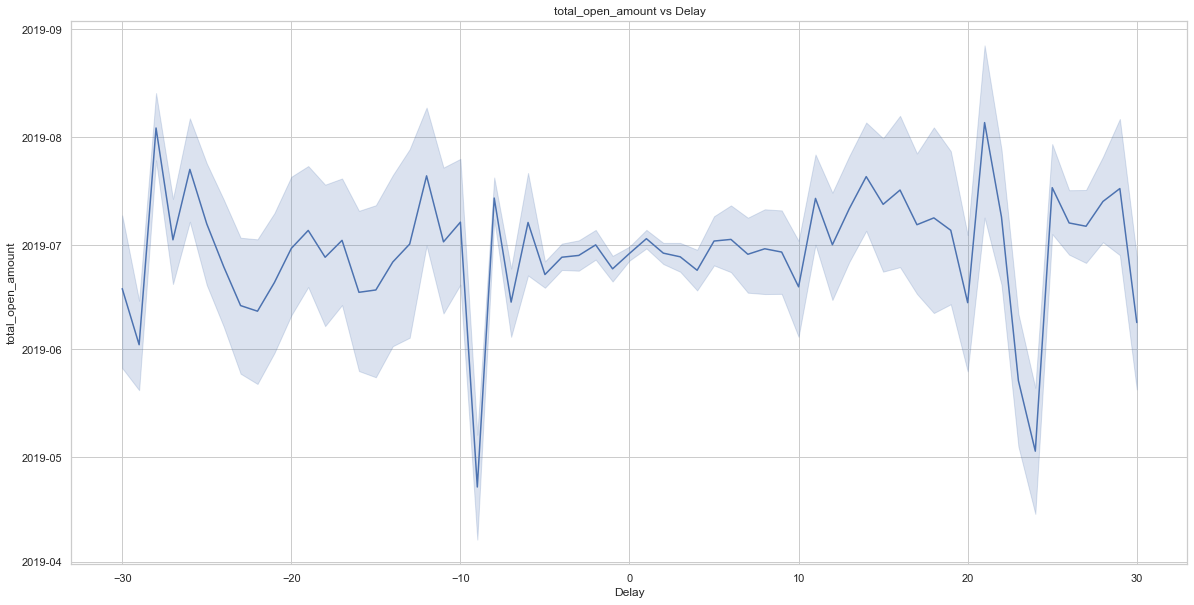

In [32]:
plt.figure(figsize=(20,10))
sns.lineplot( train['delay'],train['due_in_date'])
plt.ylabel("total_open_amount")
plt.xlabel("Delay")
plt.title("total_open_amount vs Delay")
plt.show()

<AxesSubplot:xlabel='business_code', ylabel='count'>

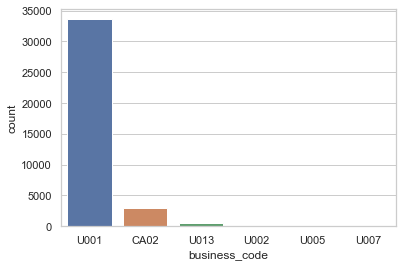

In [33]:
sns.countplot(x='business_code', data=train)

<AxesSubplot:xlabel='business_code', ylabel='delay'>

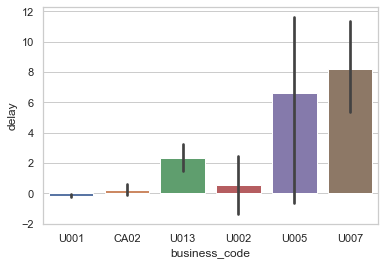

In [34]:
sns.barplot(x='business_code',y='delay',data=train)

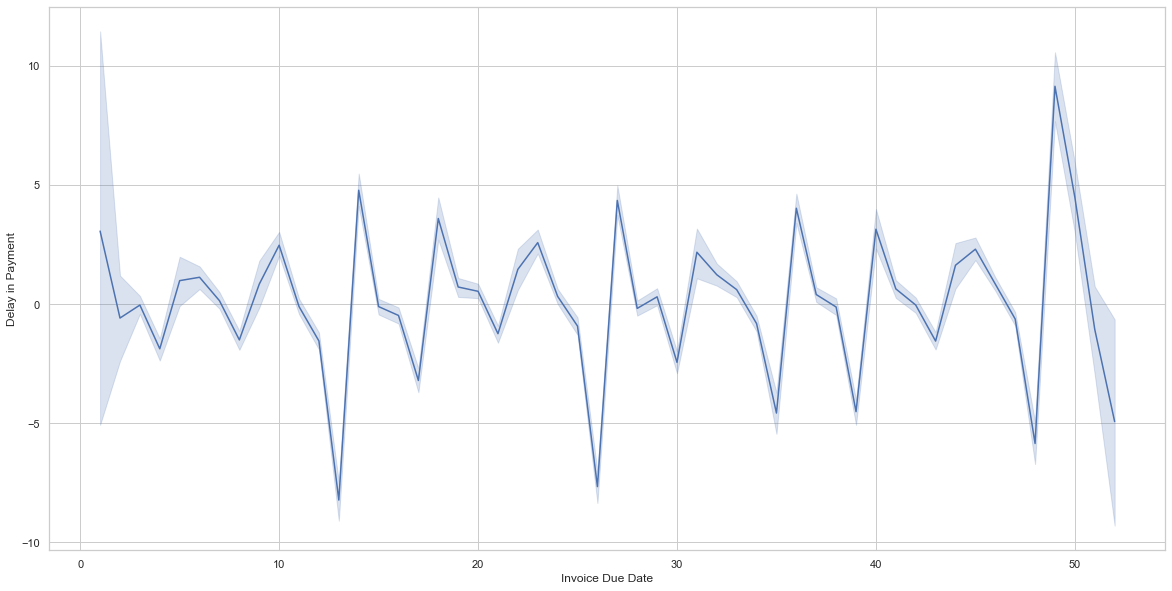

In [36]:
plt.figure(figsize=(20,10))
sns.lineplot(train['due_in_date'].dt.week,train['delay'])
plt.xlabel("Invoice Due Date")
plt.ylabel("Delay in Payment")
plt.show()

# feature engineering and encoding the data

In [37]:
labelencoder = LabelEncoder()
train['name_customer'] = labelencoder.fit_transform(train['name_customer'])
vali['name_customer'] = labelencoder.fit_transform(vali['name_customer'])
test['name_customer'] = labelencoder.fit_transform(test['name_customer'])

In [38]:
labelencoder = LabelEncoder()
train['cust_payment_terms'] = labelencoder.fit_transform(train['cust_payment_terms'])
vali['cust_payment_terms'] = labelencoder.fit_transform(vali['cust_payment_terms'])
test['cust_payment_terms'] = labelencoder.fit_transform(test['cust_payment_terms'])

In [39]:
labelencoder = LabelEncoder()
train['business_code'] = labelencoder.fit_transform(train['business_code'])
vali['business_code'] = labelencoder.fit_transform(vali['business_code'])
test['business_code'] = labelencoder.fit_transform(test['business_code'])

In [40]:
labelencoder = LabelEncoder()
train['cust_number'] = labelencoder.fit_transform(train['cust_number'])
vali['cust_number'] = labelencoder.fit_transform(vali['cust_number'])
test['cust_number'] = labelencoder.fit_transform(test['cust_number'])

# feature adding here

In [41]:
map_bcode_a = train.groupby('business_code')['total_open_amount'].agg('mean')
train['bcode_total_open_amount_avg'] = train['business_code'].map(map_bcode_a)
vali['bcode_total_open_amount_avg'] = vali['business_code'].map(map_bcode_a)
test['bcode_total_open_amount_avg'] = test['business_code'].map(map_bcode_a)

In [42]:
map_bcode_d = train.groupby('business_code')['delay'].agg('mean')
train['bcode_delay_avg'] = train['business_code'].map(map_bcode_d)
vali['bcode_delay_avg'] = vali['business_code'].map(map_bcode_d)
test['bcode_delay_avg'] = test['business_code'].map(map_bcode_d)

In [43]:
map_cust_p_d = train.groupby('cust_payment_terms')['delay'].agg('mean')
train['cust_pay_delay_avg'] = train['cust_payment_terms'].map(map_cust_p_d)
vali['cust_pay_delay_avg'] = vali['cust_payment_terms'].map(map_cust_p_d)
test['cust_pay_delay_avg'] = test['cust_payment_terms'].map(map_cust_p_d)

In [44]:
map_cust_p_a = train.groupby('cust_payment_terms')['total_open_amount'].agg('mean')
train['cust_pay_total_open_amount_avg'] = train['cust_payment_terms'].map(map_cust_p_a)
vali['cust_pay_total_open_amount_avg'] = vali['cust_payment_terms'].map(map_cust_p_a)
test['cust_pay_total_open_amount_avg'] = test['cust_payment_terms'].map(map_cust_p_a)

In [45]:
map_bcode_d = train.groupby('business_code')['delay'].agg(np.sum)
train['bcode_delay_sum'] = train['business_code'].map(map_bcode_d)
vali['bcode_delay_sum'] = vali['business_code'].map(map_bcode_d)
test['bcode_delay_sum'] = test['business_code'].map(map_bcode_d)

In [46]:
map_cust_p_a = train.groupby('cust_payment_terms')['total_open_amount'].agg('mean')
train['cust_pay_total_open_amount_avg'] = train['cust_payment_terms'].map(map_cust_p_a)
vali['cust_pay_total_open_amount_avg'] = vali['cust_payment_terms'].map(map_cust_p_a)
train['cust_pay_total_open_amount_avg'] = test['cust_payment_terms'].map(map_cust_p_a)

In [47]:
map_cust_p_d = train.groupby('cust_payment_terms')['delay'].agg('mean')
train['cust_pay_delay_avg'] = train['cust_payment_terms'].map(map_cust_p_d)
vali['cust_pay_delay_avg'] = vali['cust_payment_terms'].map(map_cust_p_a)
test['cust_pay_delay_avg'] = test['cust_payment_terms'].map(map_cust_p_a)


In [48]:
map_cust_p_d = train.groupby('cust_payment_terms')['delay'].agg(np.sum)
train['cust_pay_delay_sum'] = train['cust_payment_terms'].map(map_cust_p_d)
vali['cust_pay_delay_sum'] = vali['cust_payment_terms'].map(map_cust_p_d)
test['cust_pay_delay_sum'] = test['cust_payment_terms'].map(map_cust_p_d)

In [49]:
map_cust_no_d = train.groupby('cust_number')['delay'].agg('mean')
train['cust_no_delay_avg'] = train['cust_number'].map(map_cust_no_d)
vali['cust_no_delay_avg'] = vali['cust_number'].map(map_cust_no_d)
test['cust_no_delay_avg'] = test['cust_number'].map(map_cust_no_d)

In [50]:
train["early_payments"]=np.where(train['delay']<0,1,0)
vali["early_payments"]=np.where(vali['delay']<0,1,0)
test["early_payments"]=np.where(test['delay']<0,1,0)

In [51]:
x2 = stats.boxcox(train['total_open_amount'])[0]
x3 = pd.Series(x2)

In [52]:
train['box_cox_amount'] = x3

In [53]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37214 entries, 37543 to 24817
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   business_code                   37214 non-null  int32         
 1   cust_number                     37214 non-null  int32         
 2   name_customer                   37214 non-null  int32         
 3   clear_date                      37214 non-null  datetime64[ns]
 4   buisness_year                   37214 non-null  float64       
 5   posting_date                    37214 non-null  datetime64[ns]
 6   document_create_date            37214 non-null  datetime64[ns]
 7   due_in_date                     37214 non-null  datetime64[ns]
 8   total_open_amount               37214 non-null  float64       
 9   baseline_create_date            37214 non-null  datetime64[ns]
 10  cust_payment_terms              37214 non-null  int32         
 11

<AxesSubplot:>

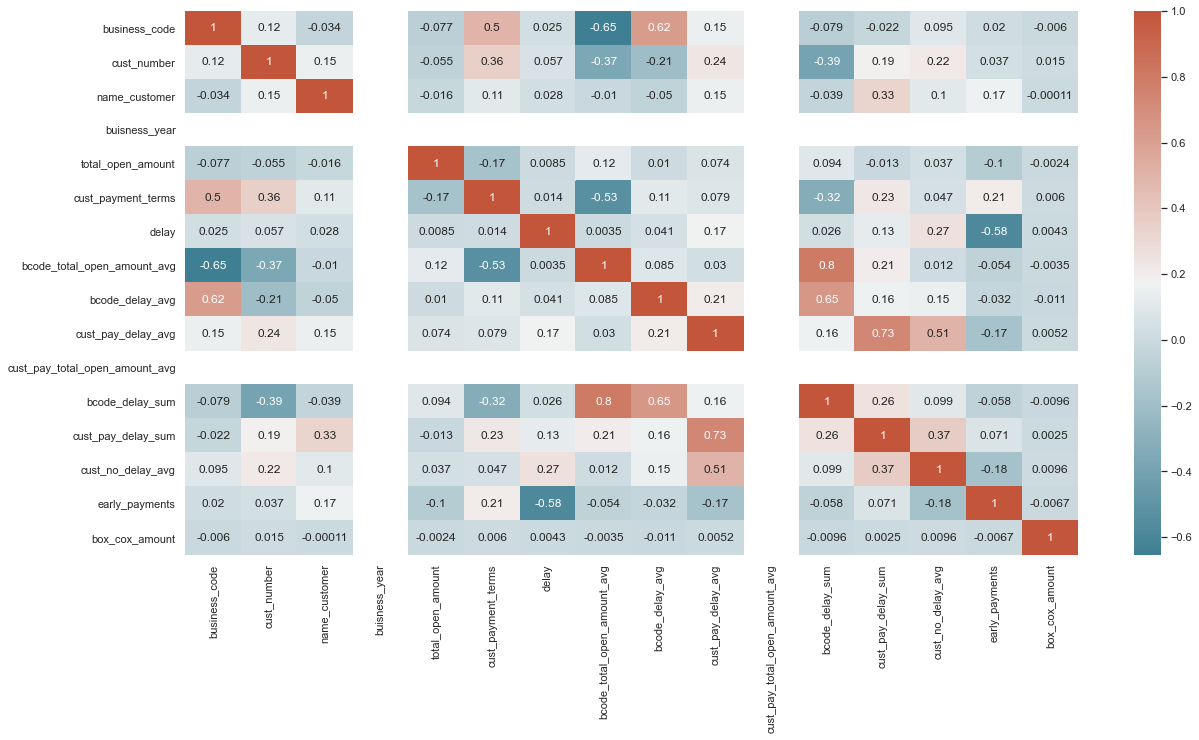

In [54]:
plt.figure(figsize=(20,10))
corr = train.corr()# plot the heatmap
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

In [55]:
train = train.drop(['buisness_year'],axis=1)
train

,business_code,cust_number,name_customer,clear_date,posting_date,document_create_date,due_in_date,total_open_amount,baseline_create_date,cust_payment_terms,delay,bcode_total_open_amount_avg,bcode_delay_avg,cust_pay_delay_avg,cust_pay_total_open_amount_avg,bcode_delay_sum,cust_pay_delay_sum,cust_no_delay_avg,early_payments,box_cox_amount
37543,1,837,3736,2019-01-09,2018-12-30,2018-12-29,2019-01-14,364.9600,2018-12-30,35,-5,29893.547857,-0.167182,0.061950,NaN,-5619,605,0.103034,1,NaN
29016,1,721,1395,2019-01-18,2018-12-30,2018-12-29,2019-01-14,7011.3800,2018-12-30,21,4,29893.547857,-0.167182,-0.128285,NaN,-5619,-1933,-1.604167,0,5.449763
13001,1,837,3742,2019-01-09,2018-12-30,2018-12-29,2019-01-14,25912.5200,2018-12-30,35,-5,29893.547857,-0.167182,0.061950,NaN,-5619,605,0.103034,1,28.042469
10146,1,837,3735,2019-01-09,2018-12-30,2018-12-29,2019-01-14,1972.0100,2018-12-30,35,-5,29893.547857,-0.167182,0.061950,NaN,-5619,605,0.103034,1,37.037990
22109,0,398,3487,2019-05-01,2018-12-30,2018-12-30,2019-01-10,93001.4465,2018-12-31,6,-9,45752.116163,0.232440,0.177167,NaN,685,509,0.467532,1,53.615220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20387,1,908,780,2019-12-02,2019-11-18,2019-11-15,2019-12-03,11135.2700,2019-11-18,23,-1,29893.547857,-0.167182,0.109302,NaN,-5619,94,0.275591,1,39.186232
8338,1,837,3740,2019-11-29,2019-11-18,2019-11-18,2019-12-03,8154.8500,2019-11-18,35,26,29893.547857,-0.167182,0.061950,NaN,-5619,605,0.103034,0,34.230082
834,1,698,2795,2019-12-20,2019-11-18,2019-11-18,2019-12-03,13228.8300,2019-11-18,21,17,29893.547857,-0.167182,-0.128285,NaN,-5619,-1933,-0.232179,0,56.574870
24066,1,691,1029,2019-12-03,2019-11-18,2019-11-16,2019-12-03,24803.3300,2019-11-18,21,0,29893.547857,-0.167182,-0.128285,NaN,-5619,-1933,-0.455479,0,28.629540


In [56]:
train['high_low_price'] = np.where(train['total_open_amount']>37240,1,0)
vali['high_low_price'] = np.where(vali['total_open_amount']>37240,1,0)
test['high_low_price'] = np.where(test['total_open_amount']>37240,1,0)

In [57]:
train['log_amount'] = np.log(train['total_open_amount']) #log transformation
vali['log_amount'] = np.log(vali['total_open_amount'])
test['log_amount'] = np.log(test['total_open_amount'])

In [58]:
train['document_create_month'] = train['clear_date'].dt.month
vali['document_create_month'] = vali['clear_date'].dt.month
test['document_create_month'] = test['clear_date'].dt.month

In [59]:
train['dayofweek'] = train['document_create_date'].dt.dayofweek
vali['dayofweek'] = vali['document_create_date'].dt.dayofweek
test['dayofweek'] = test['document_create_date'].dt.dayofweek

In [60]:
#let normalize the total amount which is in usd
from sklearn.preprocessing import MinMaxScaler 

train['total_open_amount_normalize'] = MinMaxScaler().fit_transform(np.array(train['total_open_amount']).reshape(-1,1))
vali['total_open_amount_normalize'] = MinMaxScaler().fit_transform(np.array(vali['total_open_amount']).reshape(-1,1)) 
test['total_open_amount_normalize'] = MinMaxScaler().fit_transform(np.array(test['total_open_amount']).reshape(-1,1)) 



In [61]:
([col for col in test])

['business_code',
 'cust_number',
 'name_customer',
 'clear_date',
 'buisness_year',
 'posting_date',
 'document_create_date',
 'due_in_date',
 'total_open_amount',
 'baseline_create_date',
 'cust_payment_terms',
 'delay',
 'bcode_total_open_amount_avg',
 'bcode_delay_avg',
 'cust_pay_delay_avg',
 'cust_pay_total_open_amount_avg',
 'bcode_delay_sum',
 'cust_pay_delay_sum',
 'cust_no_delay_avg',
 'early_payments',
 'high_low_price',
 'log_amount',
 'document_create_month',
 'dayofweek',
 'total_open_amount_normalize']

In [62]:
train.dropna(how='any',axis=1,inplace=True)  #checked if any column has full null value and got deleted(eg.area_of_business)
train.dropna(how='any',axis=0,inplace=True)  #checked if any row has full null value and got deleted
train

,business_code,cust_number,name_customer,clear_date,posting_date,document_create_date,due_in_date,total_open_amount,baseline_create_date,cust_payment_terms,...,cust_pay_delay_avg,bcode_delay_sum,cust_pay_delay_sum,cust_no_delay_avg,early_payments,high_low_price,log_amount,document_create_month,dayofweek,total_open_amount_normalize
37543,1,837,3736,2019-01-09,2018-12-30,2018-12-29,2019-01-14,364.9600,2018-12-30,35,...,0.061950,-5619,605,0.103034,1,0,5.899788,1,5,0.000545
29016,1,721,1395,2019-01-18,2018-12-30,2018-12-29,2019-01-14,7011.3800,2018-12-30,21,...,-0.128285,-5619,-1933,-1.604167,0,0,8.855290,1,5,0.010486
13001,1,837,3742,2019-01-09,2018-12-30,2018-12-29,2019-01-14,25912.5200,2018-12-30,35,...,0.061950,-5619,605,0.103034,1,0,10.162482,1,5,0.038756
10146,1,837,3735,2019-01-09,2018-12-30,2018-12-29,2019-01-14,1972.0100,2018-12-30,35,...,0.061950,-5619,605,0.103034,1,0,7.586809,1,5,0.002949
22109,0,398,3487,2019-05-01,2018-12-30,2018-12-30,2019-01-10,93001.4465,2018-12-31,6,...,0.177167,685,509,0.467532,1,1,11.440370,5,6,0.139099
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20387,1,908,780,2019-12-02,2019-11-18,2019-11-15,2019-12-03,11135.2700,2019-11-18,23,...,0.109302,-5619,94,0.275591,1,0,9.317873,12,4,0.016654
8338,1,837,3740,2019-11-29,2019-11-18,2019-11-18,2019-12-03,8154.8500,2019-11-18,35,...,0.061950,-5619,605,0.103034,0,0,9.006368,11,0,0.012196
834,1,698,2795,2019-12-20,2019-11-18,2019-11-18,2019-12-03,13228.8300,2019-11-18,21,...,-0.128285,-5619,-1933,-0.232179,0,0,9.490154,12,0,0.019785
24066,1,691,1029,2019-12-03,2019-11-18,2019-11-16,2019-12-03,24803.3300,2019-11-18,21,...,-0.128285,-5619,-1933,-0.455479,0,0,10.118733,12,5,0.037097


In [63]:
train.isnull().any().sum()

0

In [64]:
train.dropna(how='any',axis=1,inplace=True)  #checked if any column has full null value and got deleted(eg.area_of_business)
train.dropna(how='any',axis=0,inplace=True)  #checked if any row has full null value and got deleted
train

,business_code,cust_number,name_customer,clear_date,posting_date,document_create_date,due_in_date,total_open_amount,baseline_create_date,cust_payment_terms,...,cust_pay_delay_avg,bcode_delay_sum,cust_pay_delay_sum,cust_no_delay_avg,early_payments,high_low_price,log_amount,document_create_month,dayofweek,total_open_amount_normalize
37543,1,837,3736,2019-01-09,2018-12-30,2018-12-29,2019-01-14,364.9600,2018-12-30,35,...,0.061950,-5619,605,0.103034,1,0,5.899788,1,5,0.000545
29016,1,721,1395,2019-01-18,2018-12-30,2018-12-29,2019-01-14,7011.3800,2018-12-30,21,...,-0.128285,-5619,-1933,-1.604167,0,0,8.855290,1,5,0.010486
13001,1,837,3742,2019-01-09,2018-12-30,2018-12-29,2019-01-14,25912.5200,2018-12-30,35,...,0.061950,-5619,605,0.103034,1,0,10.162482,1,5,0.038756
10146,1,837,3735,2019-01-09,2018-12-30,2018-12-29,2019-01-14,1972.0100,2018-12-30,35,...,0.061950,-5619,605,0.103034,1,0,7.586809,1,5,0.002949
22109,0,398,3487,2019-05-01,2018-12-30,2018-12-30,2019-01-10,93001.4465,2018-12-31,6,...,0.177167,685,509,0.467532,1,1,11.440370,5,6,0.139099
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20387,1,908,780,2019-12-02,2019-11-18,2019-11-15,2019-12-03,11135.2700,2019-11-18,23,...,0.109302,-5619,94,0.275591,1,0,9.317873,12,4,0.016654
8338,1,837,3740,2019-11-29,2019-11-18,2019-11-18,2019-12-03,8154.8500,2019-11-18,35,...,0.061950,-5619,605,0.103034,0,0,9.006368,11,0,0.012196
834,1,698,2795,2019-12-20,2019-11-18,2019-11-18,2019-12-03,13228.8300,2019-11-18,21,...,-0.128285,-5619,-1933,-0.232179,0,0,9.490154,12,0,0.019785
24066,1,691,1029,2019-12-03,2019-11-18,2019-11-16,2019-12-03,24803.3300,2019-11-18,21,...,-0.128285,-5619,-1933,-0.455479,0,0,10.118733,12,5,0.037097


In [155]:
X = np.array(train[[
'business_code',
 'cust_number',
 'name_customer',
 #'clear_date',
 #'posting_date',
 #'document_create_date',
 #'due_in_date',
 'total_open_amount',
 #'baseline_create_date',
 'cust_payment_terms',
 #'delay',
 'bcode_total_open_amount_avg',
 'bcode_delay_avg',
 'cust_pay_delay_avg',
 'cust_pay_delay_sum',
  #'bcode_delay_sum',
 'cust_no_delay_avg',
 #'early_payments',
 'document_create_month',
 'log_amount',
 #'high_low_price',
 'dayofweek',
'total_open_amount_normalize'
                   ]])
Y = np.array(train['delay'])

In [156]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.3,random_state=101)

In [157]:
from sklearn.ensemble import RandomForestRegressor
clf = RandomForestRegressor()

In [158]:
clf.fit(x_train,y_train)

RandomForestRegressor()

In [159]:
y1_test_pred = clf.predict(x_test)

In [160]:
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())
    
print("Mean absolute error =", round(sm.mean_absolute_error(y_test, y1_test_pred), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_test, y1_test_pred), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y_test, y1_test_pred), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_test, y1_test_pred), 2)) 
print("R2 score =", round(sm.r2_score(y_test, y1_test_pred), 2))
x = rmse(y1_test_pred,y_test)
print(x)

Mean absolute error = 4.86
Mean squared error = 70.74
Median absolute error = 2.11
Explain variance score = 0.05
R2 score = 0.05
8.410599350469804


In [161]:
vali.dropna(how='any',axis=1,inplace=True)  #checked if any column has full null value and got deleted(eg.area_of_business)
vali.dropna(how='any',axis=0,inplace=True)  #checked if any row has full null value and got deleted
vali

,business_code,cust_number,name_customer,clear_date,buisness_year,posting_date,document_create_date,due_in_date,total_open_amount,baseline_create_date,...,cust_pay_total_open_amount_avg,bcode_delay_sum,cust_pay_delay_sum,cust_no_delay_avg,early_payments,high_low_price,log_amount,document_create_month,dayofweek,total_open_amount_normalize
7782,1,272,407,2019-12-03,2019.0,2019-11-18,2019-11-19,2019-12-03,41624.8800,2019-11-18,...,715.900000,-5619,-3,-5.000000,0,1,10.636453,12,1,0.101775
11900,0,112,427,2019-12-17,2019.0,2019-11-18,2019-11-18,2019-11-28,50086.8611,2019-11-18,...,42938.980667,685,-41,4.000000,1,1,10.821514,12,0,0.122469
18603,1,387,1072,2019-12-04,2019.0,2019-11-18,2019-11-17,2019-12-03,37337.2600,2019-11-18,...,715.900000,-5619,-3,0.500000,0,1,10.527747,12,6,0.091289
38828,1,436,584,2019-12-20,2019.0,2019-11-18,2019-11-14,2019-11-18,5089.0100,2019-11-18,...,12388.972380,-5619,-394,0.857143,0,0,8.534839,12,3,0.012423
43673,1,393,1000,2019-12-03,2019.0,2019-11-18,2019-11-18,2019-12-03,118623.8000,2019-11-18,...,715.900000,-5619,-3,9.857143,0,1,11.683712,12,0,0.290082
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25837,1,310,1176,2020-01-30,2020.0,2020-01-13,2020-01-11,2020-01-28,4515.0300,2020-01-13,...,23418.361988,-5619,94,-12.000000,0,0,8.415167,1,5,0.011019
26211,1,360,489,2020-01-30,2020.0,2020-01-13,2020-01-14,2020-01-28,89166.7900,2020-01-13,...,715.900000,-5619,-3,-1.958904,0,1,11.398264,1,1,0.218042
40428,0,36,56,2020-01-31,2020.0,2020-01-13,2020-01-13,2020-01-25,16742.9440,2020-01-15,...,42938.980667,685,-41,1.600000,0,0,9.725732,1,0,0.040924
44306,1,310,1178,2020-01-24,2020.0,2020-01-13,2020-01-14,2020-01-28,26190.6700,2020-01-13,...,23418.361988,-5619,94,-12.000000,1,0,10.173159,1,1,0.064029


In [162]:
test.dropna(how='any',axis=1,inplace=True)  #checked if any column has full null value and got deleted(eg.area_of_business)
test.dropna(how='any',axis=0,inplace=True)  #checked if any row has full null value and got deleted
test

,business_code,cust_number,name_customer,clear_date,buisness_year,posting_date,document_create_date,due_in_date,total_open_amount,baseline_create_date,...,cust_pay_total_open_amount_avg,bcode_delay_sum,cust_pay_delay_sum,cust_no_delay_avg,early_payments,high_low_price,log_amount,document_create_month,dayofweek,total_open_amount_normalize
36469,1,218,40,2020-01-28,2020.0,2020-01-13,2020-01-11,2020-01-28,2029.8000,2020-01-13,...,1028.500000,-5619,23,28.000000,0,0,7.615693,1,5,0.003079
15163,0,140,701,2020-02-05,2020.0,2020-01-13,2020-01-13,2020-01-25,9856.9564,2020-01-15,...,44200.070000,685,8,-2.333333,1,0,9.195933,2,0,0.014974
39745,1,187,292,2020-01-25,2020.0,2020-01-13,2020-01-10,2020-01-28,34104.5700,2020-01-13,...,1028.500000,-5619,23,0.000000,1,0,10.437187,1,4,0.051825
3735,1,276,607,2020-01-14,2020.0,2020-01-13,2020-01-13,2020-01-28,432.6700,2020-01-13,...,1028.500000,-5619,23,2.500000,1,0,6.069975,1,0,0.000651
30657,0,135,1032,2020-01-27,2020.0,2020-01-13,2020-01-13,2020-01-25,43015.5000,2020-01-15,...,44200.070000,685,8,1.000000,0,1,10.669316,1,0,0.065368
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42478,1,364,1288,2020-03-17,2020.0,2020-02-27,2020-02-25,2020-03-13,10401.6300,2020-02-27,...,20962.565333,-5619,11,0.729032,0,0,9.249718,3,1,0.015802
29462,1,353,508,2020-03-13,2020.0,2020-02-27,2020-02-27,2020-03-13,17377.5400,2020-02-27,...,1028.500000,-5619,23,12.000000,0,0,9.762934,3,3,0.026404
8137,1,320,873,2020-03-16,2020.0,2020-02-27,2020-02-26,2020-03-13,25143.0200,2020-02-27,...,1028.500000,-5619,23,-4.545455,0,0,10.132336,3,2,0.038206
7879,0,145,1276,2020-03-18,2020.0,2020-02-27,2020-02-27,2020-03-09,13281.4326,2020-02-28,...,44200.070000,685,8,-4.500000,0,0,9.494122,3,3,0.020179


In [163]:
[col for col in vali]

['business_code',
 'cust_number',
 'name_customer',
 'clear_date',
 'buisness_year',
 'posting_date',
 'document_create_date',
 'due_in_date',
 'total_open_amount',
 'baseline_create_date',
 'cust_payment_terms',
 'delay',
 'bcode_total_open_amount_avg',
 'bcode_delay_avg',
 'cust_pay_delay_avg',
 'cust_pay_total_open_amount_avg',
 'bcode_delay_sum',
 'cust_pay_delay_sum',
 'cust_no_delay_avg',
 'early_payments',
 'high_low_price',
 'log_amount',
 'document_create_month',
 'dayofweek',
 'total_open_amount_normalize']

In [168]:
vali_X = np.array(vali[[
 'business_code',
 'cust_number',
 'name_customer',
 #'clear_date',
 #'posting_date',
 #'document_create_date',
 #'due_in_date',
 'total_open_amount',
 #'baseline_create_date',
 'cust_payment_terms',
 #'delay',
 'bcode_total_open_amount_avg',
 'bcode_delay_avg',
 'cust_pay_delay_avg',
 'cust_pay_delay_sum',
  #'bcode_delay_sum',
 'cust_no_delay_avg',
 #'early_payments',
 'document_create_month',
 'log_amount',
 #'high_low_price',
 'dayofweek',
'total_open_amount_normalize']])
vali_Y = np.array(vali['delay'])

In [169]:
y2_predict = clf.predict(vali_X)
y2_predict = y2_predict.round()

In [170]:
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())
    
print("Mean absolute error =", round(sm.mean_absolute_error(vali_Y, y2_predict), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(vali_Y,y2_predict), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(vali_Y, y2_predict), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(vali_Y, y2_predict), 2)) 
print("R2 score =", round(sm.r2_score( y2_predict,vali_Y), 2))
x = rmse(y2_predict,vali_Y)
print(x)

Mean absolute error = 9.1
Mean squared error = 133.2
Median absolute error = 7.0
Explain variance score = -1.68
R2 score = -0.42
11.541180148015297


In [171]:
clf.score(vali_X,vali_Y)

-1.7911980593449286

In [90]:
[col for col in test]

['business_code',
 'cust_number',
 'name_customer',
 'clear_date',
 'buisness_year',
 'posting_date',
 'document_create_date',
 'due_in_date',
 'total_open_amount',
 'baseline_create_date',
 'cust_payment_terms',
 'delay',
 'bcode_total_open_amount_avg',
 'bcode_delay_avg',
 'cust_pay_delay_avg',
 'cust_pay_total_open_amount_avg',
 'bcode_delay_sum',
 'cust_pay_delay_sum',
 'cust_no_delay_avg',
 'early_payments',
 'high_low_price',
 'log_amount',
 'document_create_month',
 'dayofweek',
 'total_open_amount_normalize']

In [174]:
test_X = np.array(test[[
 'business_code',
 'cust_number',
 'name_customer',
 #'clear_date',
 #'posting_date',
 #'document_create_date',
 #'due_in_date',
 'total_open_amount',
 #'baseline_create_date',
 'cust_payment_terms',
 #'delay',
 'bcode_total_open_amount_avg',
 'bcode_delay_avg',
 'cust_pay_delay_avg',
 'cust_pay_delay_sum',
  #'bcode_delay_sum',
 'cust_no_delay_avg',
 #'early_payments',
 'document_create_month',
 'log_amount',
 #'high_low_price',
 'dayofweek',
'total_open_amount_normalize']])
test_Y = np.array(test['delay'])

In [175]:
y3_predict = clf.predict(test_X)
y3_predict = y2_predict.round()

In [176]:
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())
    
print("Mean absolute error =", round(sm.mean_absolute_error(test_Y, y3_predict), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(test_Y,y3_predict), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(test_Y, y3_predict), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(test_Y, y3_predict), 2)) 
print("R2 score =", round(sm.r2_score(test_Y, y3_predict), 2))
x = rmse(y3_predict,vali_Y)
print(x)

Mean absolute error = 10.49
Mean squared error = 173.34
Median absolute error = 9.0
Explain variance score = -1.11
R2 score = -1.15
11.541180148015297


In [177]:
super_test.head()

,business_code,cust_number,name_customer,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,...,document_create_month,bcode_total_open_amount_avg,bcode_delay_avg,cust_pay_delay_avg,cust_pay_total_open_amount_avg,log_amount,cust_pay_delay_sum,cust_no_delay_avg,dayofweek,total_open_amount_normalize
46691,1,196,112,2020-03-06,20200306,2020-03-06,2020-03-21,USD,194.78,2020-03-06,...,3,29893.547857,-0.167182,-3.0,715.90,5.271871,-3,2.6,5,0.000775
46692,1,200,734,2020-04-19,20200418,2020-04-19,2020-05-04,USD,16360.32,2020-04-19,...,5,29893.547857,-0.167182,-3.0,715.90,9.702614,-3,3.0,0,0.065337
46693,1,175,679,2020-03-14,20200312,2020-03-14,2020-03-29,USD,151765.50,2020-03-14,...,3,29893.547857,-0.167182,-3.0,715.90,11.930092,-3,-8.5,6,0.606121
46694,0,70,597,2020-03-18,20200318,2020-03-18,2020-03-30,CAD,76268.59,2020-03-20,...,3,45752.116163,0.232440,0.5,7337.98,11.242016,1,-3.0,0,0.304600
46695,1,383,954,2020-05-09,20200509,2020-05-09,2020-05-24,USD,32884.18,2020-05-09,...,5,29893.547857,-0.167182,5.0,42411.60,10.400747,5,4.0,6,0.131331


In [178]:
super_test = super_test.drop(['clear_date','document type','posting_id','area_business','isOpen'],axis=1)

KeyError: "['clear_date' 'document type' 'posting_id' 'area_business' 'isOpen'] not found in axis"

In [179]:
super_test

,business_code,cust_number,name_customer,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,...,document_create_month,bcode_total_open_amount_avg,bcode_delay_avg,cust_pay_delay_avg,cust_pay_total_open_amount_avg,log_amount,cust_pay_delay_sum,cust_no_delay_avg,dayofweek,total_open_amount_normalize
46691,1,196,112,2020-03-06,20200306,2020-03-06,2020-03-21,USD,194.78,2020-03-06,...,3,29893.547857,-0.167182,-3.000000,715.900000,5.271871,-3,2.600000,5,0.000775
46692,1,200,734,2020-04-19,20200418,2020-04-19,2020-05-04,USD,16360.32,2020-04-19,...,5,29893.547857,-0.167182,-3.000000,715.900000,9.702614,-3,3.000000,0,0.065337
46693,1,175,679,2020-03-14,20200312,2020-03-14,2020-03-29,USD,151765.50,2020-03-14,...,3,29893.547857,-0.167182,-3.000000,715.900000,11.930092,-3,-8.500000,6,0.606121
46694,0,70,597,2020-03-18,20200318,2020-03-18,2020-03-30,CAD,76268.59,2020-03-20,...,3,45752.116163,0.232440,0.500000,7337.980000,11.242016,1,-3.000000,0,0.304600
46695,1,383,954,2020-05-09,20200509,2020-05-09,2020-05-24,USD,32884.18,2020-05-09,...,5,29893.547857,-0.167182,5.000000,42411.600000,10.400747,5,4.000000,6,0.131331
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,1,247,956,2020-03-22,20200320,2020-03-22,2020-04-06,USD,2518.66,2020-03-22,...,4,29893.547857,-0.167182,5.000000,42411.600000,7.831482,5,7.000000,0,0.010056
49996,1,259,141,2020-04-08,20200408,2020-04-08,2020-04-23,USD,431.50,2020-04-08,...,4,29893.547857,-0.167182,-3.000000,715.900000,6.067268,-3,2.500000,3,0.001720
49997,1,140,654,2020-03-13,20200313,2020-03-13,2020-03-28,USD,124959.22,2020-03-13,...,3,29893.547857,-0.167182,-3.000000,715.900000,11.735743,-3,-2.333333,5,0.499061
49998,1,265,591,2020-03-31,20200330,2020-03-31,2020-04-15,USD,52664.95,2020-03-31,...,4,29893.547857,-0.167182,-3.000000,715.900000,10.871705,-3,-5.000000,2,0.210331


In [102]:
super_test = super_test.drop(['buisness_year'],axis=1)


In [103]:
super_test = super_test.drop(['doc_id','invoice_id'],axis=1)

In [113]:
# correcting the date formats 
super_test['posting_date'] = pd.to_datetime(super_test['posting_date'], format='%Y/%m/%d')
super_test['baseline_create_date'] = pd.to_datetime(super_test['baseline_create_date'], format='%Y%m%d')
super_test['document_create_date.1'] = pd.to_datetime(super_test['document_create_date.1'].astype(str), format='%Y-%m-%d')
super_test['due_in_date'] = pd.to_datetime(super_test['due_in_date'], format='%Y%m%d')
super_test


,business_code,cust_number,name_customer,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms
46691,1,196,BJ'S systems,2020-03-06,20200306,2020-03-06,2020-03-21,USD,194.78,2020-03-06,13
46692,1,200,SA associates,2020-04-19,20200418,2020-04-19,2020-05-04,USD,16360.32,2020-04-19,13
46693,1,175,PUBLI systems,2020-03-14,20200312,2020-03-14,2020-03-29,USD,151765.50,2020-03-14,13
46694,0,70,METRO llc,2020-03-18,20200318,2020-03-18,2020-03-30,CAD,76268.59,2020-03-20,3
46695,1,383,WAL-MAR associates,2020-05-09,20200509,2020-05-09,2020-05-24,USD,32884.18,2020-05-09,25
...,...,...,...,...,...,...,...,...,...,...,...
49995,1,247,WAL-MAR corp,2020-03-22,20200320,2020-03-22,2020-04-06,USD,2518.66,2020-03-22,25
49996,1,259,C us,2020-04-08,20200408,2020-04-08,2020-04-23,USD,431.50,2020-04-08,13
49997,1,140,PERISH,2020-03-13,20200313,2020-03-13,2020-03-28,USD,124959.22,2020-03-13,13
49998,1,265,MEIJ us,2020-03-31,20200330,2020-03-31,2020-04-15,USD,52664.95,2020-03-31,13


In [107]:
labelencoder = LabelEncoder()
super_test['cust_payment_terms'] = labelencoder.fit_transform(super_test['cust_payment_terms'])

In [131]:
labelencoder = LabelEncoder()
super_test['name_customer'] = labelencoder.fit_transform(super_test['name_customer'])

In [108]:
labelencoder = LabelEncoder()
super_test['cust_number'] = labelencoder.fit_transform(super_test['cust_number'])

In [109]:
labelencoder = LabelEncoder()
super_test['business_code'] = labelencoder.fit_transform(super_test['business_code'])

In [110]:
labelencoder = LabelEncoder()
super_test['cust_payment_terms'] = labelencoder.fit_transform(super_test['cust_payment_terms'])

In [123]:
super_test['log_amount'] = np.log(super_test['total_open_amount']) #log transformation

In [115]:
super_test['document_create_month'] = super_test['due_in_date'].dt.month

In [116]:
map_bcode_a = train.groupby('business_code')['total_open_amount'].agg('mean')
super_test['bcode_total_open_amount_avg'] = super_test['business_code'].map(map_bcode_a)


In [117]:
map_bcode_d = train.groupby('business_code')['delay'].agg('mean')
super_test['bcode_delay_avg'] = super_test['business_code'].map(map_bcode_d)

In [119]:
map_cust_p_d = train.groupby('cust_payment_terms')['delay'].agg('mean')
super_test['cust_pay_delay_avg'] = super_test['cust_payment_terms'].map(map_cust_p_d)

In [120]:
map_cust_p_a = train.groupby('cust_payment_terms')['total_open_amount'].agg('mean')
super_test['cust_pay_total_open_amount_avg'] = super_test['cust_payment_terms'].map(map_cust_p_a)

In [118]:
map_bcode_d = train.groupby('business_code')['delay'].agg(np.sum)
super_test['bcode_delay_sum'] = super_test['business_code'].map(map_bcode_d)

In [121]:
map_cust_p_a = train.groupby('cust_payment_terms')['total_open_amount'].agg('mean')
super_test['cust_pay_total_open_amount_avg'] = super_test['cust_payment_terms'].map(map_cust_p_a)

In [124]:
map_cust_p_d = train.groupby('cust_payment_terms')['delay'].agg('mean')
super_test['cust_pay_delay_avg'] = super_test['cust_payment_terms'].map(map_cust_p_d)


In [125]:
map_cust_p_d = train.groupby('cust_payment_terms')['delay'].agg(np.sum)
super_test['cust_pay_delay_sum'] = super_test['cust_payment_terms'].map(map_cust_p_d)

In [126]:
map_cust_no_d = train.groupby('cust_number')['delay'].agg('mean')
super_test['cust_no_delay_avg'] = super_test['cust_number'].map(map_cust_no_d)


In [133]:
super_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3309 entries, 46691 to 49999
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   business_code                   3309 non-null   int32         
 1   cust_number                     3309 non-null   int32         
 2   name_customer                   3309 non-null   int32         
 3   posting_date                    3309 non-null   datetime64[ns]
 4   document_create_date            3309 non-null   int64         
 5   document_create_date.1          3309 non-null   datetime64[ns]
 6   due_in_date                     3309 non-null   datetime64[ns]
 7   invoice_currency                3309 non-null   object        
 8   total_open_amount               3309 non-null   float64       
 9   baseline_create_date            3309 non-null   datetime64[ns]
 10  cust_payment_terms              3309 non-null   int64         
 11 

In [140]:
map_cust_no_d = train.groupby('cust_number')['delay'].agg('mean')
super_test['cust_no_delay_avg'] = super_test['cust_number'].map(map_cust_no_d)


In [141]:
super_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3309 entries, 46691 to 49999
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   business_code                   3309 non-null   int32         
 1   cust_number                     3309 non-null   int32         
 2   name_customer                   3309 non-null   int32         
 3   posting_date                    3309 non-null   datetime64[ns]
 4   document_create_date            3309 non-null   int64         
 5   document_create_date.1          3309 non-null   datetime64[ns]
 6   due_in_date                     3309 non-null   datetime64[ns]
 7   invoice_currency                3309 non-null   object        
 8   total_open_amount               3309 non-null   float64       
 9   baseline_create_date            3309 non-null   datetime64[ns]
 10  cust_payment_terms              3309 non-null   int64         
 11 

In [144]:
super_test['dayofweek'] = super_test['due_in_date'].dt.dayofweek

In [145]:
train['document_create_month'] = train['due_in_date'].dt.month

In [146]:
from sklearn.preprocessing import MinMaxScaler 

super_test['total_open_amount_normalize'] = MinMaxScaler().fit_transform(np.array(super_test['total_open_amount']).reshape(-1,1))


In [147]:
map_bcode_d = train.groupby('business_code')['delay'].agg('mean')
super_test['bcode_delay_avg'] = super_test['business_code'].map(map_bcode_d)

In [181]:
X3 = np.array(super_test[['business_code',
 'cust_number',
 'name_customer',
 #'clear_date',
 #'posting_date',
 #'document_create_date',
 #'due_in_date',
 'total_open_amount',
 #'baseline_create_date',
 'cust_payment_terms',
 #'delay',
 'bcode_total_open_amount_avg',
 'bcode_delay_avg',
 'cust_pay_delay_avg',
 'cust_pay_delay_sum',
  #'bcode_delay_sum',
 'cust_no_delay_avg',
 #'early_payments',
 'document_create_month',
 'log_amount',
 #'high_low_price',
 'dayofweek',
'total_open_amount_normalize'
                   ]])
Y3 = np.array(train['delay'])

In [182]:
predicted = clf.predict(X3)

In [183]:
predicted

array([ 1.64,  1.62, -4.16, ..., -6.64, -4.64, -8.5 ])

In [184]:
super_test['new_delay'] = " "
super_test

,business_code,cust_number,name_customer,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,...,bcode_total_open_amount_avg,bcode_delay_avg,cust_pay_delay_avg,cust_pay_total_open_amount_avg,log_amount,cust_pay_delay_sum,cust_no_delay_avg,dayofweek,total_open_amount_normalize,new_delay
46691,1,196,112,2020-03-06,20200306,2020-03-06,2020-03-21,USD,194.78,2020-03-06,...,29893.547857,-0.167182,-3.000000,715.900000,5.271871,-3,2.600000,5,0.000775,
46692,1,200,734,2020-04-19,20200418,2020-04-19,2020-05-04,USD,16360.32,2020-04-19,...,29893.547857,-0.167182,-3.000000,715.900000,9.702614,-3,3.000000,0,0.065337,
46693,1,175,679,2020-03-14,20200312,2020-03-14,2020-03-29,USD,151765.50,2020-03-14,...,29893.547857,-0.167182,-3.000000,715.900000,11.930092,-3,-8.500000,6,0.606121,
46694,0,70,597,2020-03-18,20200318,2020-03-18,2020-03-30,CAD,76268.59,2020-03-20,...,45752.116163,0.232440,0.500000,7337.980000,11.242016,1,-3.000000,0,0.304600,
46695,1,383,954,2020-05-09,20200509,2020-05-09,2020-05-24,USD,32884.18,2020-05-09,...,29893.547857,-0.167182,5.000000,42411.600000,10.400747,5,4.000000,6,0.131331,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,1,247,956,2020-03-22,20200320,2020-03-22,2020-04-06,USD,2518.66,2020-03-22,...,29893.547857,-0.167182,5.000000,42411.600000,7.831482,5,7.000000,0,0.010056,
49996,1,259,141,2020-04-08,20200408,2020-04-08,2020-04-23,USD,431.50,2020-04-08,...,29893.547857,-0.167182,-3.000000,715.900000,6.067268,-3,2.500000,3,0.001720,
49997,1,140,654,2020-03-13,20200313,2020-03-13,2020-03-28,USD,124959.22,2020-03-13,...,29893.547857,-0.167182,-3.000000,715.900000,11.735743,-3,-2.333333,5,0.499061,
49998,1,265,591,2020-03-31,20200330,2020-03-31,2020-04-15,USD,52664.95,2020-03-31,...,29893.547857,-0.167182,-3.000000,715.900000,10.871705,-3,-5.000000,2,0.210331,


In [186]:
super_test['new_delay']=predicted

In [189]:
temp = super_test['new_delay'].apply(np.ceil).apply(lambda x:pd.Timedelta(x, unit='D'))

In [190]:
super_test['predicted_clear_date'] = super_test['due_in_date']+temp

In [191]:
super_test['aging_bucket'] = ""
super_test.loc[super_test['new_delay'].apply(int)>60,'aging_bucket'] = ">60"
super_test.loc[(super_test['new_delay'].apply(int)>= 46) & (super_test['new_delay'].apply(int)<= 60),'aging_bucket'] ="46-60"
super_test.loc[(super_test['new_delay'].apply(int)>= 31) & (super_test['new_delay'].apply(int)<= 45),'aging_bucket'] ="31-45"
super_test.loc[(super_test['new_delay'].apply(int)<= 30) & (super_test['new_delay'].apply(int)>= 16),'aging_bucket'] ="16-30"
super_test.loc[(super_test['new_delay'].apply(int)<= 15) & (super_test['new_delay'].apply(int)>0),'aging_bucket']  = "0-15"
super_test.loc[super_test['new_delay'].apply(int)<=0,'aging_bucket'] = "< 0"

In [192]:
super_test

,business_code,cust_number,name_customer,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,...,cust_pay_delay_avg,cust_pay_total_open_amount_avg,log_amount,cust_pay_delay_sum,cust_no_delay_avg,dayofweek,total_open_amount_normalize,new_delay,predicted_clear_date,aging_bucket
46691,1,196,112,2020-03-06,20200306,2020-03-06,2020-03-21,USD,194.78,2020-03-06,...,-3.000000,715.900000,5.271871,-3,2.600000,5,0.000775,1.64,2020-03-23,0-15
46692,1,200,734,2020-04-19,20200418,2020-04-19,2020-05-04,USD,16360.32,2020-04-19,...,-3.000000,715.900000,9.702614,-3,3.000000,0,0.065337,1.62,2020-05-06,0-15
46693,1,175,679,2020-03-14,20200312,2020-03-14,2020-03-29,USD,151765.50,2020-03-14,...,-3.000000,715.900000,11.930092,-3,-8.500000,6,0.606121,-4.16,2020-03-25,< 0
46694,0,70,597,2020-03-18,20200318,2020-03-18,2020-03-30,CAD,76268.59,2020-03-20,...,0.500000,7337.980000,11.242016,1,-3.000000,0,0.304600,-6.16,2020-03-24,< 0
46695,1,383,954,2020-05-09,20200509,2020-05-09,2020-05-24,USD,32884.18,2020-05-09,...,5.000000,42411.600000,10.400747,5,4.000000,6,0.131331,6.69,2020-05-31,0-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,1,247,956,2020-03-22,20200320,2020-03-22,2020-04-06,USD,2518.66,2020-03-22,...,5.000000,42411.600000,7.831482,5,7.000000,0,0.010056,3.73,2020-04-10,0-15
49996,1,259,141,2020-04-08,20200408,2020-04-08,2020-04-23,USD,431.50,2020-04-08,...,-3.000000,715.900000,6.067268,-3,2.500000,3,0.001720,4.14,2020-04-28,0-15
49997,1,140,654,2020-03-13,20200313,2020-03-13,2020-03-28,USD,124959.22,2020-03-13,...,-3.000000,715.900000,11.735743,-3,-2.333333,5,0.499061,-6.64,2020-03-22,< 0
49998,1,265,591,2020-03-31,20200330,2020-03-31,2020-04-15,USD,52664.95,2020-03-31,...,-3.000000,715.900000,10.871705,-3,-5.000000,2,0.210331,-4.64,2020-04-11,< 0
